In [148]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
from numpy.random import *
import seaborn as sns
#CTRL+D:同時書き換え

In [186]:
obj_func(0.7)

0.02259441541679836

In [199]:
def obj_func(x):
  return (3*(x-1)**2+np.log(1+8*np.abs(x)))

In [171]:
def apr_grad(x,t,delta,obj_func):
  n=1
  num=0
  for i in range(5000):
    y=float(np.random.normal(x, np.sqrt(delta*t), 1)) #平均，標準偏差
    num+=(y)*np.exp((-(delta)**(-1))*obj_func(y))
  num=num/5000
  deno=0
  for i in range(5000):
    y=float(np.random.normal(x, np.sqrt(delta*t), 1)) #平均，標準偏差
    deno+=np.exp((-(delta)**(-1))*obj_func(y))
  deno=deno/5000
  print("分母は...")
  print(deno)
  return num/deno

In [172]:
#timestepを出力
def timestep(t_k,g_k,g_km1,tau,T,theta1,theta2,epstime,etap,etam):
  if g_k**2<theta1*g_km1**2+epstime:
    return min(etap*t_k,T)
  elif g_k**2<theta2*g_km1**2+epstime:
    return t_k
  else:
    return max(etam*t_k,tau)

In [200]:
#パラメータの設定
#etap,etamはηについての仮定
etap=1.2
etam=0.8
delta=1 #expの発散を抑えるパラメータ
alp=1
#step tについて
tau=0.005
T=500
epstime=0.1 
theta1=0.2
theta2=0.5

#問題設定


#以下，次元によって変わってくる変数の設定
#ADMMの初期化
adm_x=-1#uの初期値
x_k=[]
x_1=-1
x_k.append(x_1)#x=10からスタート
prx_k=[]
g_k=[]
g_k.append(0) #g_0が定義できないので仕方なく入れている_問題依存するので注意
t_ini=10
t_k=[]
t_k.append(t_ini)

In [201]:
def MAD(x_1,alp,tau,t_ini,T):
  for k in range(200):
    prx_k_=apr_grad(x_k[k],t_k[k],0.01,obj_func)
    print(prx_k_)
    prx_k.append(prx_k_)
    g_k_=(x_k[k]-prx_k_)/t_k[k]
    g_k.append(g_k_)
    x_kp1=x_k[k]-alp*t_k[k]*g_k_
    x_k.append(x_kp1)
    t_kp1=timestep(t_k[k],g_k[k+1],g_k[k],tau,T,theta1,theta2,epstime,etap,etam)
    t_k.append(t_kp1)

In [202]:
MAD(x_1,alp,tau,t_ini,T)

分母は...
1.3081374227044933e-134
0.0015283299397186865
分母は...
7.288731808006624e-95
0.6435221554152227
分母は...
8.924616243847914e-94
0.8127906877428343
分母は...
9.611958613121822e-94
0.7826780974323285
分母は...
7.935448563079321e-94
0.807673893685828
分母は...
7.711841085864203e-94
0.8399469126266976
分母は...
7.144173222029138e-94
0.8324374405030177
分母は...
6.133849396202969e-94
0.8707733114960499
分母は...
5.545511596623393e-94
0.9106386526949458
分母は...
5.336693712556379e-94
0.7354643666479118
分母は...
4.7345609102005174e-94
0.8526196948962795
分母は...
4.5391479170970734e-94
0.849362699616183
分母は...
4.0081793501757775e-94
0.8678672786396516
分母は...
3.901607185633817e-94
0.8220537477451721
分母は...
3.3803125964008034e-94
0.8980417764362572
分母は...
3.0589585596847696e-94
0.705890228133531
分母は...
2.887421595825426e-94
0.8165834992771666
分母は...
2.601977358928154e-94
0.8241961943191886
分母は...
2.2464389035155597e-94
0.8085139370239505
分母は...
2.135737158855743e-94
0.8560817146954357
分母は...
1.957232717477337e-94
0.9

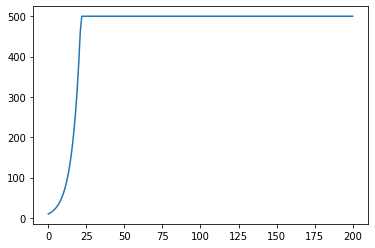

In [204]:
plt.plot(t_k)

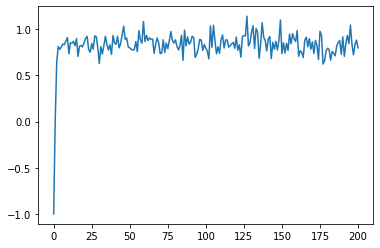

In [203]:
plt.plot(x_k)

In [ ]:
np.mean(x_k[10:20])

0.8322631531583008